In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

In [3]:
encoded_numberer = '11010'

In [4]:
def detector(circuit, number):
    for idx in range(len(number)):
        if number[idx] == '0':
            circuit.x(idx)

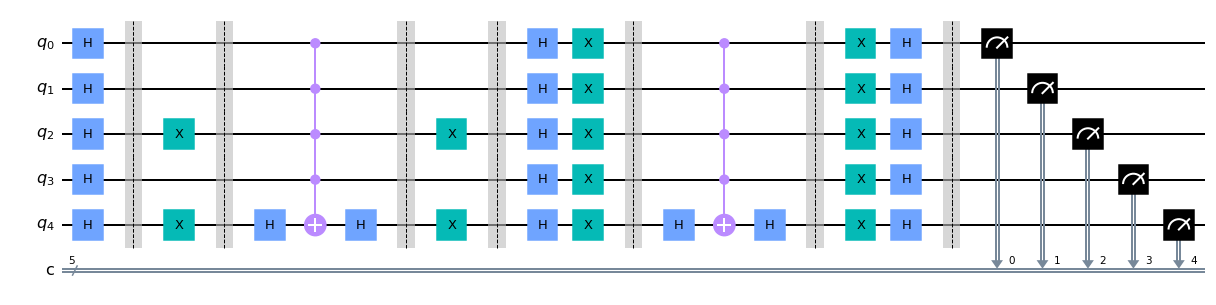

In [5]:
n_qubits = len(encoded_numberer)

qc = QuantumCircuit(n_qubits,n_qubits)

qc.h(range(n_qubits))
qc.barrier()

# start oracle
detector(qc, encoded_numberer)

qc.barrier()
qc.h(n_qubits - 1)
qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
qc.h(n_qubits - 1)
qc.barrier()

detector(qc, encoded_numberer)
# end oracle

# diffusion amplification
qc.barrier()
qc.h(range(n_qubits))
qc.x(range(n_qubits))

qc.barrier()
qc.h(n_qubits - 1)
qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
qc.h(n_qubits - 1)

qc.barrier()

qc.x(range(n_qubits))
qc.h(range(n_qubits))
# end diffusion amplification

qc.barrier()

qc.measure(range(n_qubits), range(n_qubits))
qc.draw(output='mpl')

In [6]:
# simulators
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

In [7]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1024).result().get_counts()

{'01100': 17, '10100': 19, '11101': 18, '01110': 17, '11100': 30, '11110': 22, '11011': 18, '11010': 29, '01000': 25, '11001': 25, '00000': 22, '01011': 261, '00011': 28, '00100': 21, '00110': 26, '10011': 25, '00001': 18, '01101': 27, '11111': 29, '10010': 25, '10110': 27, '00010': 21, '10000': 18, '10101': 32, '00111': 33, '10111': 27, '11000': 26, '01111': 25, '01010': 29, '10001': 26, '01001': 28, '00101': 30}


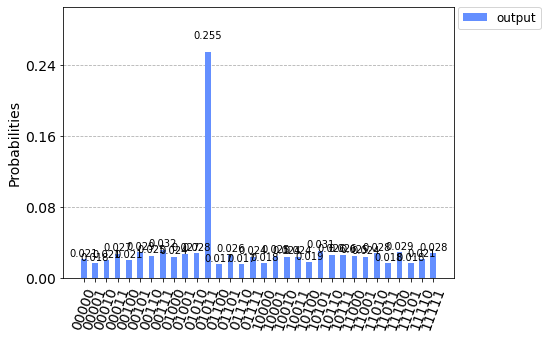

In [8]:
print(sim_counts)
plot_histogram([sim_counts], legend=['output'])

In [10]:
import qiskit.quantum_info as qi
rho_H = qi.DensityMatrix(sim_state_vector)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>